In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("Company A - data.csv")

In [15]:
data.head(5)

,id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [16]:
for j in range(0,len(data)):
    if data['SeniorCitizen'][j] == 0:
         data.loc[j,'SeniorCitizen'] = 'No'
    elif data['SeniorCitizen'][j] == 1:
            data.loc[j,'SeniorCitizen'] = 'Yes'

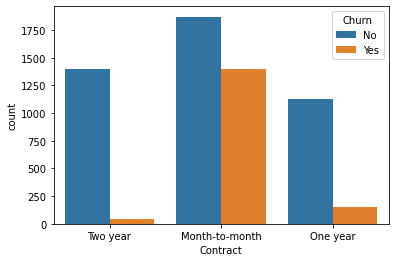

In [17]:
#Customers are on month-to-month plan are 4-14 times more likely to churn, regardless of the plan purchased
g = sns.countplot(x='Contract', hue='Churn', data = data)

[None, None, None, None, None, None, None, None]

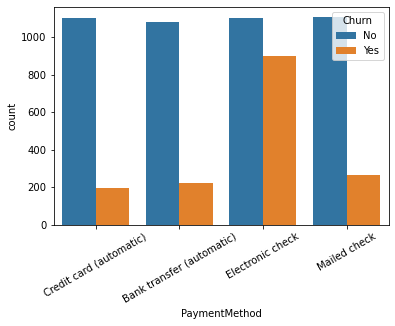

In [18]:
#Customers who paid by electronic check are 2-3 times more likely to churn
sns.countplot(x='PaymentMethod', hue='Churn', data = data)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)

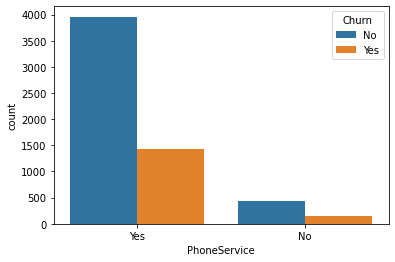

In [19]:
sns.countplot(x='PhoneService', hue='Churn', data = data)

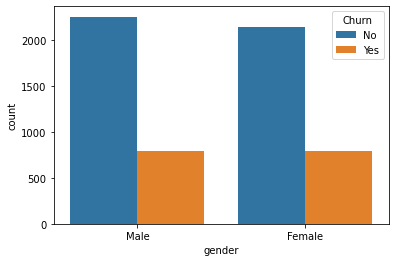

In [20]:
sns.countplot(x='gender', hue='Churn', data = data)

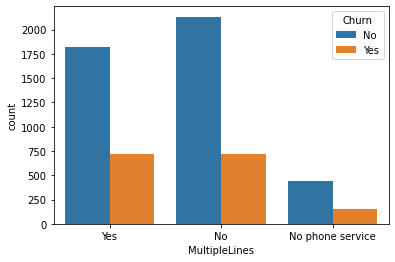

In [21]:
sns.countplot(x='MultipleLines', hue='Churn', data = data)

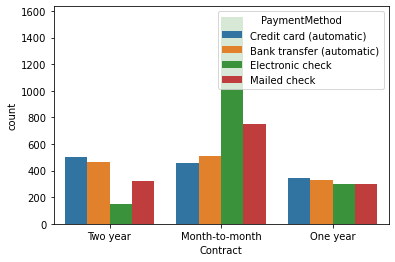

In [22]:
#Close to half of customers who are on month-to-month plan pay by electronic check
sns.countplot(x='Contract', hue='PaymentMethod', data = data)

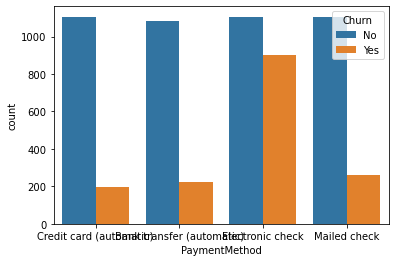

In [23]:
sns.countplot(x='PaymentMethod', hue='Churn', data = data)

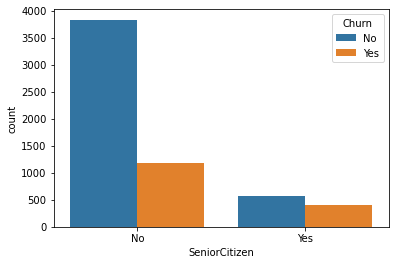

In [24]:
#Senior customers are 2 times more likely to churn
sns.countplot(x='SeniorCitizen', hue='Churn', data = data)

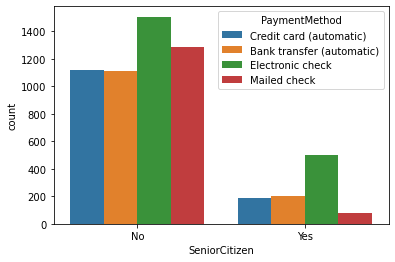

In [25]:
#Senior customers' preferred method to pay is electronic check
sns.countplot(x='SeniorCitizen', hue='PaymentMethod', data = data)

In [26]:
data.iloc[:,10:16]

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
1,No,Yes,Yes,No,Yes,No
2,No,No,No,No,No,No
3,No,No,No,No,No,Yes
4,Yes,No,Yes,No,No,No
...,...,...,...,...,...,...
5981,Yes,No,No,No,Yes,Yes
5982,Yes,Yes,Yes,Yes,Yes,Yes
5983,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5984,No,No,Yes,No,Yes,Yes


In [27]:
data['Add-ons'] = 0

for i in range(0,len(data)):
    count = 0
    for j in range(10,16):
        if data.iloc[i,j] == "Yes":
            count = count + 1
    if data.loc[i,'InternetService'] == 'No':
        data.loc[i,'Add-ons'] = -1
    else:
        data.loc[i,'Add-ons'] = count
data = data.sort_values("Add-ons")

In [28]:
for i in range(0,len(data)):
    if data.loc[i,'PhoneService'] == 'Yes' and data.loc[i,'InternetService'] == 'No':
        data.loc[i,'Plan'] = "Phone Only"
    elif data.loc[i,'PhoneService'] == 'Yes' and data.loc[i,'Add-ons'] == 0:
        data.loc[i,'Plan'] = "Phone + Internet Only"
    elif data.loc[i,'PhoneService'] == 'Yes' and data.loc[i,'Add-ons'] > 0:
        data.loc[i,'Plan'] = "Phone + Internet + Add-ons"
    elif data.loc[i,'PhoneService'] == 'No' and data.loc[i,'Add-ons'] == 0:
        data.loc[i,'Plan'] = "Internet Only"
    elif data.loc[i,'PhoneService'] == 'No' and data.loc[i,'Add-ons'] > 0:
        data.loc[i,'Plan'] = "Internet + Add-ons"

In [29]:
for i in range(0,len(data)):
    if data.loc[i,'Add-ons'] == -1:
        data.loc[i,'Add-ons'] = "No Internet"

In [30]:
data['Plan'].unique()

array(['Phone Only', 'Phone + Internet Only', 'Internet Only',
       'Phone + Internet + Add-ons', 'Internet + Add-ons'], dtype=object)

In [31]:
charges = data.loc[:,('SeniorCitizen','MonthlyCharges','Add-ons','Churn','Plan')]
charges

,SeniorCitizen,MonthlyCharges,Add-ons,Churn,Plan
0,No,24.10,No Internet,No,Phone Only
2882,No,19.60,No Internet,No,Phone Only
2870,No,19.40,No Internet,No,Phone Only
2862,No,20.20,No Internet,No,Phone Only
2857,No,19.30,No Internet,No,Phone Only
...,...,...,...,...,...
862,No,90.95,6,No,Phone + Internet + Add-ons
4799,Yes,114.50,6,No,Phone + Internet + Add-ons
4816,Yes,85.65,6,No,Phone + Internet + Add-ons
3477,No,115.85,6,No,Phone + Internet + Add-ons


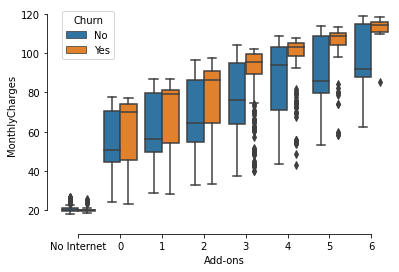

In [32]:
#Senior customers pay 7 pounds more on average for phone+int+ any add-ons
#Try phone,phone+int,int,phone+int+add,int+add no phone
box1 = sns.boxplot(x="Add-ons", y="MonthlyCharges",
            hue="Churn",data=charges)
sns.despine(offset=10, trim=True)

#These codes add numbers to the chart
#medians1 = charges.groupby(['Churn','Add-ons'])['MonthlyCharges'].median()
#vertical_offset = charges['MonthlyCharges'].median() * 0.05
#for xtick in box1.get_xticks():
#    box1.text(xtick,medians1[xtick] + vertical_offset,medians1[xtick], 
#            horizontalalignment='center',size='x-small',color='b',weight='semibold')

In [33]:
charges.groupby(['Churn','Add-ons'])['MonthlyCharges'].median()

Churn  Add-ons    
No     0               50.725
       1               56.225
       2               64.700
       3               75.950
       4               94.000
       5               85.950
       6               91.975
       No Internet     20.150
Yes    0               69.875
       1               79.000
       2               86.300
       3               95.550
       4              103.300
       5              108.500
       6              114.350
       No Internet     20.000
Name: MonthlyCharges, dtype: float64

In [34]:
data['Plan'].unique()

array(['Phone Only', 'Phone + Internet Only', 'Internet Only',
       'Phone + Internet + Add-ons', 'Internet + Add-ons'], dtype=object)

[None, None, None, None, None, None, None, None, None, None]

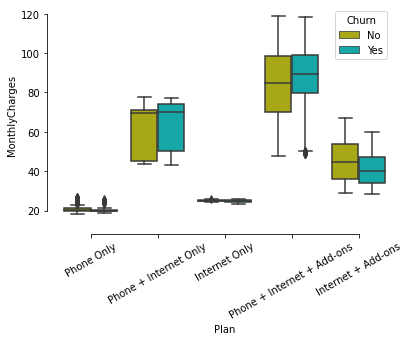

In [35]:
sns.boxplot(x="Plan", y="MonthlyCharges",
            hue="Churn", palette=["y", "c"],
            data=charges)
sns.despine(offset=10, trim=True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)

In [36]:
charges.groupby(['Churn','Plan']).median()

MonthlyCharges
Churn Plan                                      
No    Internet + Add-ons                  44.850
      Internet Only                       25.050
      Phone + Internet + Add-ons          84.800
      Phone + Internet Only               69.350
      Phone Only                          20.150
Yes   Internet + Add-ons                  40.000
      Internet Only                       24.925
      Phone + Internet + Add-ons          89.150
      Phone + Internet Only               70.100
      Phone Only                          20.000

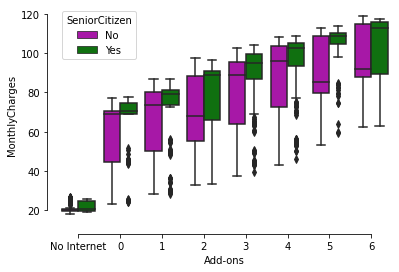

In [37]:
#Senior customers pay 7 pounds more on average for phone+int+ any add-ons
sns.boxplot(x="Add-ons", y="MonthlyCharges",
            hue="SeniorCitizen", palette=["m", "g"],
            data=charges)
sns.despine(offset=10, trim=True)

In [38]:
charges.groupby(['SeniorCitizen','Add-ons']).median()

MonthlyCharges
SeniorCitizen Add-ons                    
No            0                    68.950
              1                    73.850
              2                    68.225
              3                    88.800
              4                    95.850
              5                    85.450
              6                    92.000
              No Internet          20.150
Yes           0                    70.550
              1                    79.350
              2                    88.750
              3                    94.900
              4                   102.600
              5                   108.500
              6                   113.000
              No Internet          20.500

[None, None, None, None, None, None, None, None, None, None]

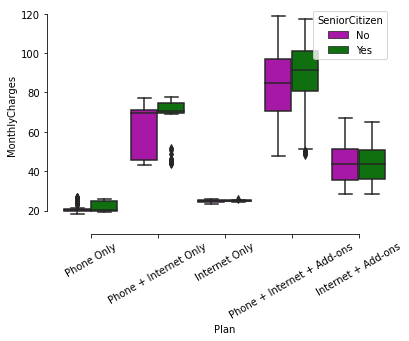

In [39]:
sns.boxplot(x="Plan", y="MonthlyCharges",
            hue="SeniorCitizen", palette=["m", "g"],
            data=charges)
sns.despine(offset=10, trim=True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)

In [40]:
charges.groupby(['SeniorCitizen','Plan']).median()

MonthlyCharges
SeniorCitizen Plan                                      
No            Internet + Add-ons                  43.825
              Internet Only                       25.000
              Phone + Internet + Add-ons          84.600
              Phone + Internet Only               69.550
              Phone Only                          20.150
Yes           Internet + Add-ons                  43.850
              Internet Only                       25.075
              Phone + Internet + Add-ons          91.350
              Phone + Internet Only               70.650
              Phone Only                          20.500

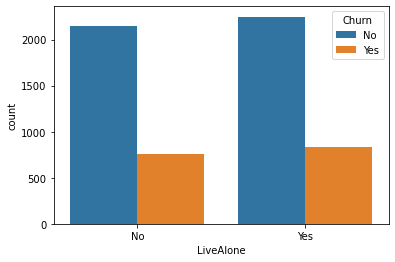

In [41]:
#Customers without partners/ dependents are 1.5- 2 times more likely to churn
data['LiveAlone'] = 'No'
for i in range(0,len(data)):
    count = 0
    for j in range(4,5):
        if data.iloc[i,j] == "Yes":
            count = count + 1
    if count == 0:
        data.loc[i,'LiveAlone'] = 'Yes'
sns.countplot(x='LiveAlone', hue='Churn', data = data)

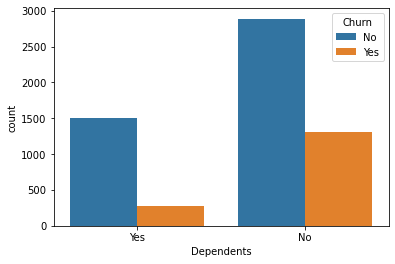

In [42]:
sns.countplot(x='Dependents', hue='Churn', data = data)

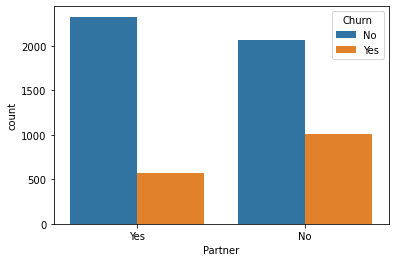

In [43]:
sns.countplot(x='Partner', hue='Churn', data = data)

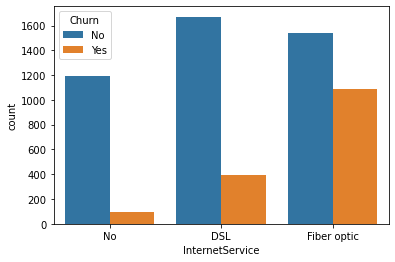

In [44]:
#Customers have fiber optic internet are 2 times more likely to churn
sns.countplot(x='InternetService', hue='Churn', data = data)

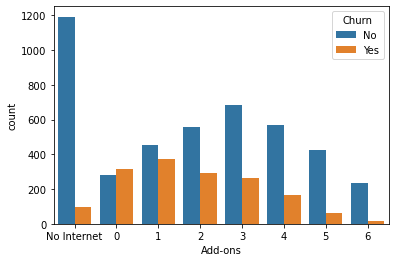

In [45]:
sns.countplot(x='Add-ons', hue='Churn', data = data)

Text(0.5, 1.0, 'Churn rate by plan')

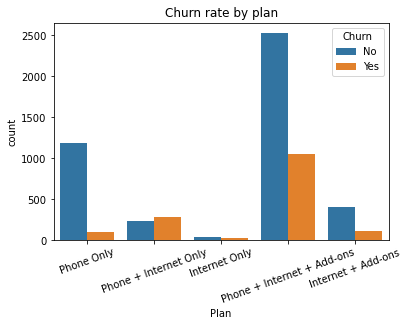

In [46]:
sns.countplot(x='Plan', hue='Churn', data = data)
locs, labels = plt.xticks()
plt.setp(labels, rotation=20)
plt.title('Churn rate by plan')

In [48]:
for i in range(0,len(data)):
    if data['TotalCharges'][i] == ' ':
        data.loc[i,'TotalCharges'] = 0
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [49]:
data['AvgPastCharge'] = round(data['TotalCharges']/data['tenure'],2)
data['RelativeChargeChange'] = round(((data['MonthlyCharges']/data['AvgPastCharge'])-1)*100,2)

In [50]:
data.columns

Index(['id', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Add-ons',
       'Plan', 'LiveAlone', 'AvgPastCharge', 'RelativeChargeChange'],
      dtype='object')

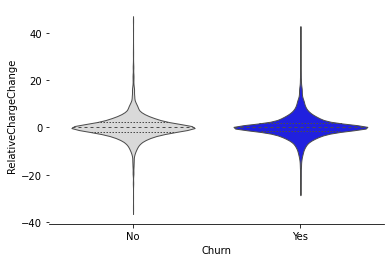

In [51]:
sns.violinplot(data=data, x="Churn", y="RelativeChargeChange",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

In [55]:
data['CustomerTerm'] = 'Less than 18 m'
for i in range(0,len(data)):
    if data.loc[i,'tenure'] > 18 and data.loc[i,'tenure'] <= 48:
        data.loc[i,'CustomerTerm'] = '18 to 48 m'
    elif data.loc[i,'tenure'] > 48:
        data.loc[i,'CustomerTerm'] = 'More than 48 m'

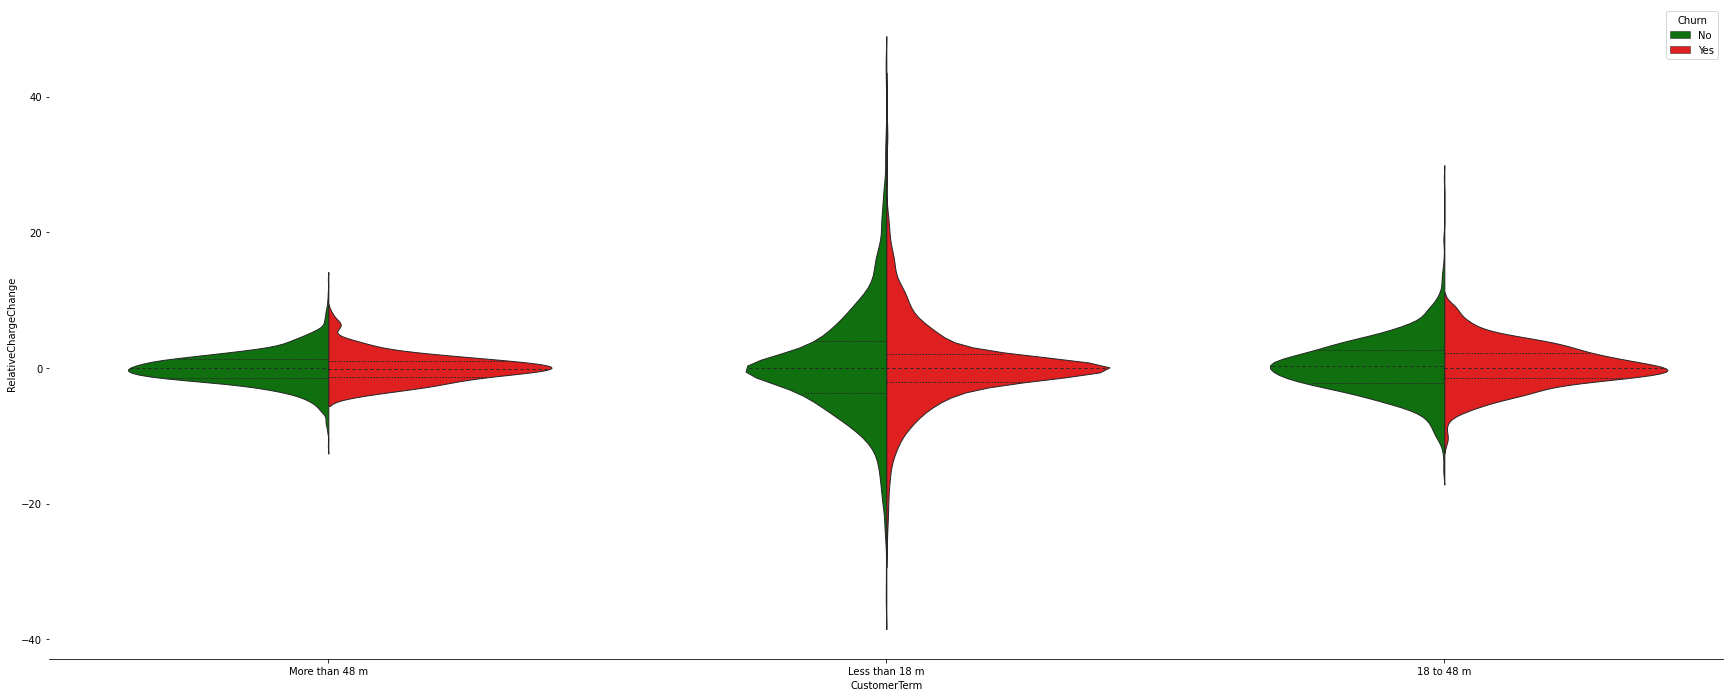

In [56]:
fig, ax = plt.subplots(figsize=(30,12))
sns.violinplot(ax = ax, data=data, x="CustomerTerm", y="RelativeChargeChange",hue = "Churn",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "r", "No": "g"})
sns.despine(left=True)

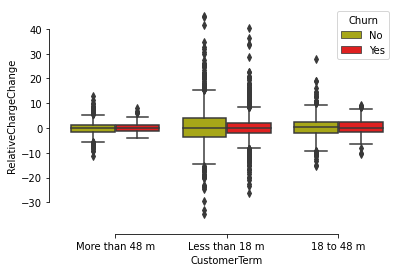

In [57]:
#Add % to ylabel
#Add the range to chart 
sns.boxplot(x="CustomerTerm", y="RelativeChargeChange",
            hue="Churn", palette=["y", "r"],
            data=data)
sns.despine(offset=10, trim=True)

In [82]:
data['CustomerTerm'].unique()
long = data[data['CustomerTerm'] == 'More than 48 m']
new = data[data['CustomerTerm'] == 'Less than 18 m']
inter = data[data['CustomerTerm'] == '18 to 48 m']

In [87]:
long.describe()

,id,tenure,MonthlyCharges,TotalCharges,AvgPastCharge,RelativeChargeChange,ContractLength
count,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000
mean,3566.368504,63.042520,74.377743,4712.342625,74.423780,-0.004892,16.970079
std,2023.548877,7.458131,31.379762,2126.164791,31.443288,2.400886,8.869718
min,9.000000,49.000000,18.400000,918.700000,17.550000,-11.510000,0.000000
25%,1805.000000,57.000000,52.700000,3085.350000,52.730000,-1.430000,12.000000
50%,3590.000000,64.000000,83.550000,5023.000000,83.040000,-0.060000,24.000000
75%,5296.000000,70.000000,100.600000,6365.350000,101.040000,1.320000,24.000000
max,7042.000000,72.000000,118.750000,8684.800000,120.750000,13.060000,24.000000


In [89]:
new.describe()

,id,tenure,MonthlyCharges,TotalCharges,AvgPastCharge,RelativeChargeChange,ContractLength
count,2306.000000,2306.000000,2306.000000,2306.000000,2296.000000,2296.000000,2306.000000
mean,3505.019948,6.900694,56.832177,407.438812,56.909408,0.482992,1.925412
std,2034.487743,5.432219,26.886008,411.020051,27.080095,7.226370,5.558881
min,0.000000,0.000000,18.750000,0.000000,13.780000,-34.690000,0.000000
25%,1744.250000,2.000000,25.400000,80.550000,26.475000,-2.810000,0.000000
50%,3512.500000,6.000000,58.450000,251.625000,59.140000,0.000000,0.000000
75%,5243.250000,11.000000,79.550000,613.287500,79.160000,3.342500,0.000000
max,7041.000000,18.000000,112.950000,1882.550000,121.400000,45.110000,24.000000


In [88]:
inter.describe()

,id,tenure,MonthlyCharges,TotalCharges,AvgPastCharge,RelativeChargeChange,ContractLength
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,3535.430986,32.872676,64.879690,2150.221775,64.826158,0.239183,7.396056
std,2050.842780,8.719906,29.707053,1203.996747,29.762446,3.878177,8.835480
min,1.000000,19.000000,18.250000,279.200000,14.690000,-15.280000,0.000000
25%,1768.000000,25.000000,35.750000,1082.000000,35.780000,-2.075000,0.000000
50%,3557.000000,32.000000,70.750000,2043.450000,71.150000,0.160000,0.000000
75%,5321.000000,41.000000,90.075000,2979.250000,90.580000,2.490000,12.000000
max,7038.000000,48.000000,117.450000,5443.650000,116.540000,27.980000,24.000000


In [68]:
data['Contract'].unique()

array(['Two year', 'Month-to-month', 'One year'], dtype=object)

In [69]:
data.head(5)

,id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,MonthlyCharges,TotalCharges,Churn,Add-ons,Plan,LiveAlone,AvgPastCharge,RelativeChargeChange,CustomerTerm,CustomerType
0,1869,7010-BRBUU,Male,No,Yes,Yes,72,Yes,Yes,No,...,24.1,1734.65,No,No Internet,Phone Only,No,24.09,0.04,More than 48 m,More than 48 m
2882,3520,6036-TTFYU,Female,No,Yes,No,16,Yes,No,No,...,19.6,314.45,No,No Internet,Phone Only,No,19.65,-0.25,Less than 18 m,NaN
2870,1847,1098-KFQEC,Female,No,Yes,Yes,55,Yes,No,No,...,19.4,1083.00,No,No Internet,Phone Only,No,19.69,-1.47,More than 48 m,More than 48 m
2862,1213,6980-IMXXE,Female,No,Yes,Yes,69,Yes,No,No,...,20.2,1412.65,No,No Internet,Phone Only,No,20.47,-1.32,More than 48 m,More than 48 m
2857,5835,4641-FROLU,Female,No,Yes,Yes,30,Yes,No,No,...,19.3,602.90,No,No Internet,Phone Only,No,20.10,-3.98,18 to 48 m,18 to 48 m


In [70]:
data['ContractLength'] = 0
for i in range(0,len(data)):
    if data.loc[i,'Contract'] == "Two year":
        data.loc[i,'ContractLength'] = 24
    elif data.loc[i,'Contract'] == "One year":
        data.loc[i,'ContractLength'] = 12

In [71]:
data['BeyondContract'] = data['tenure'] > data['ContractLength']

In [72]:
data.head(5)

,id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,Churn,Add-ons,Plan,LiveAlone,AvgPastCharge,RelativeChargeChange,CustomerTerm,CustomerType,ContractLength,BeyondContract
0,1869,7010-BRBUU,Male,No,Yes,Yes,72,Yes,Yes,No,...,No,No Internet,Phone Only,No,24.09,0.04,More than 48 m,More than 48 m,24,True
2882,3520,6036-TTFYU,Female,No,Yes,No,16,Yes,No,No,...,No,No Internet,Phone Only,No,19.65,-0.25,Less than 18 m,NaN,0,True
2870,1847,1098-KFQEC,Female,No,Yes,Yes,55,Yes,No,No,...,No,No Internet,Phone Only,No,19.69,-1.47,More than 48 m,More than 48 m,24,True
2862,1213,6980-IMXXE,Female,No,Yes,Yes,69,Yes,No,No,...,No,No Internet,Phone Only,No,20.47,-1.32,More than 48 m,More than 48 m,24,True
2857,5835,4641-FROLU,Female,No,Yes,Yes,30,Yes,No,No,...,No,No Internet,Phone Only,No,20.10,-3.98,18 to 48 m,18 to 48 m,24,True


In [73]:
beyond = data.loc[(data.ContractLength > 0)]

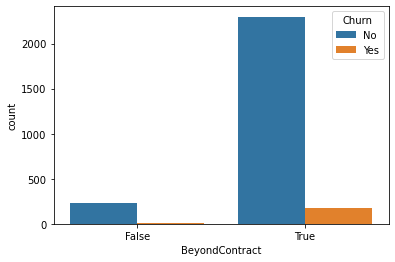

In [74]:
#Among customers who churned, the majority of them stayed beyond their contract terms
sns.countplot(x='BeyondContract', hue='Churn', data = beyond)